In [6]:
# Install any missing libraries if necessary
# !pip install pandas numpy matplotlib seaborn scipy

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Display basic information
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows of the dataset:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None

First 5 rows of the dataset:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya

In [7]:
# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()  # Dropping missing values


Missing Values:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [8]:
# --- NumPy Operations ---
# Creating fixed-type arrays
arr = np.array([1, 2, 3, 4, 5], dtype=np.int32)
print("\nNumPy Array:", arr)


NumPy Array: [1 2 3 4 5]


In [9]:
# Array slicing and reshaping
reshaped_arr = arr.reshape((5,1))
print("\nReshaped Array:\n", reshaped_arr)


Reshaped Array:
 [[1]
 [2]
 [3]
 [4]
 [5]]


In [10]:
# Aggregations
print("\nSum:", np.sum(arr))
print("Mean:", np.mean(arr))



Sum: 15
Mean: 3.0


In [11]:
# Universal function example
squared = np.square(arr)
print("\nSquared Array:", squared)


Squared Array: [ 1  4  9 16 25]


In [12]:

# Broadcasting
print("\nBroadcasting Example:", arr + 5)


Broadcasting Example: [ 6  7  8  9 10]


In [13]:


# Fancy indexing
print("\nFancy Indexing:", arr[[0, 2, 4]])


Fancy Indexing: [1 3 5]


In [14]:

# Fast sorting
print("\nSorted Array:", np.sort(arr))


Sorted Array: [1 2 3 4 5]


In [15]:
# --- Pandas Operations ---
# Series and DataFrame creation
ser = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print("\nSeries Object:\n", ser)


Series Object:
 a    10
b    20
c    30
d    40
dtype: int64


In [16]:

# Data indexing and selecting
print("\nSelected element:", ser['b'])


Selected element: 20


In [17]:
# DataFrame basic operations
print("\nDataFrame Describe:\n", df.describe())


DataFrame Describe:
           AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23035.000000  23035.000000     23035.000000   23035.000000   
mean      72.344693      1.376254        35.233905       3.084741   
std       56.360992      1.844926        28.236613       5.281708   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       80.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23035.000000  
mean         68.883482  
std          55.057396  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [18]:

# Handling Null values (already dropped earlier)
# Hierarchical indexing example
hier_index = pd.MultiIndex.from_tuples([('Delhi', 2020), ('Delhi', 2021),
                                        ('Mumbai', 2020), ('Mumbai', 2021)])
data = pd.Series([50, 55, 60, 65], index=hier_index)
print("\nHierarchical Index Series:\n", data)


Hierarchical Index Series:
 Delhi   2020    50
        2021    55
Mumbai  2020    60
        2021    65
dtype: int64


In [19]:
# --- Combining Datasets ---
# Example concat
dummy1 = pd.DataFrame({'A': [1,2]}, index=[0,1])
dummy2 = pd.DataFrame({'A': [3,4]}, index=[2,3])
combined = pd.concat([dummy1, dummy2])
print("\nCombined Dataset:\n", combined)


Combined Dataset:
    A
0  1
1  2
2  3
3  4


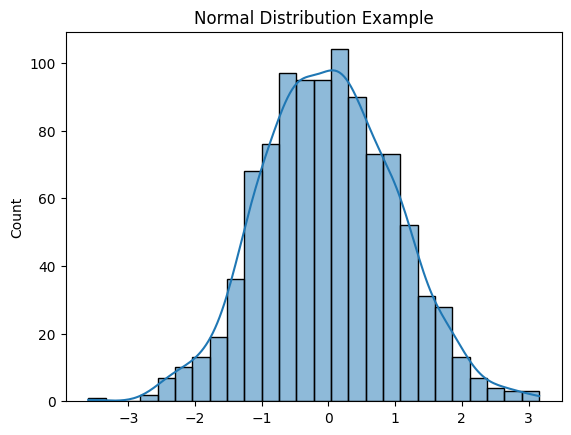

In [20]:
# --- Inferential Statistics ---
# Example Normal Distribution
sample = np.random.normal(loc=0, scale=1, size=1000)
sns.histplot(sample, kde=True)
plt.title('Normal Distribution Example')
plt.show()

In [21]:
# T-test Example
group1 = np.random.normal(0, 1, 100)
group2 = np.random.normal(0.5, 1, 100)
t_stat, p_val = ttest_ind(group1, group2)
print("\nT-test Statistic:", t_stat, "P-value:", p_val)


T-test Statistic: -4.569229005742639 P-value: 8.601755997386884e-06


In [22]:
# Chi-Square Test (only if suitable)
if df.shape[1] >= 2:
    table = pd.crosstab(df[df.columns[0]], df[df.columns[1]])
    try:
        chi2, p, dof, expected = chi2_contingency(table)
        print("\nChi-Square Test result:", chi2, p)
    except ValueError:
        print("\nChi-Square Test could not be performed (non-categorical columns).")


Chi-Square Test result: 4008090.0 0.47540402081556654


In [23]:
# ANOVA Test
anova_test = f_oneway(group1, group2)
print("\nANOVA Test Result:", anova_test)


ANOVA Test Result: F_onewayResult(statistic=np.float64(20.877853706919883), pvalue=np.float64(8.601755997386826e-06))


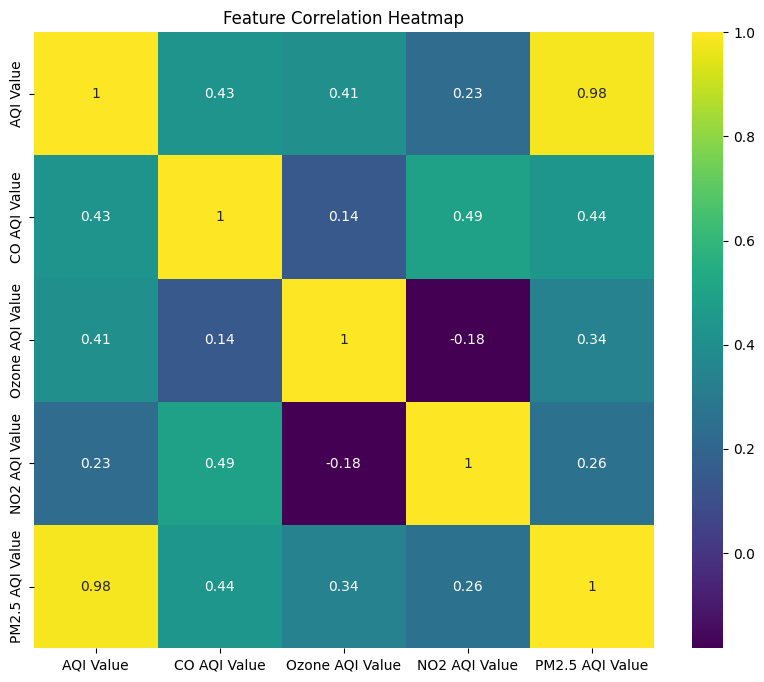

In [24]:
# --- Visualization Section ---

# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:

# Line Plot (if 'Date' column exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df[numeric_df.columns].plot(figsize=(15, 6))
    plt.title('Pollutant Levels Over Time')
    plt.show()
else:
    print("\nNo 'Date' column found. Skipping time series plot.")


No 'Date' column found. Skipping time series plot.


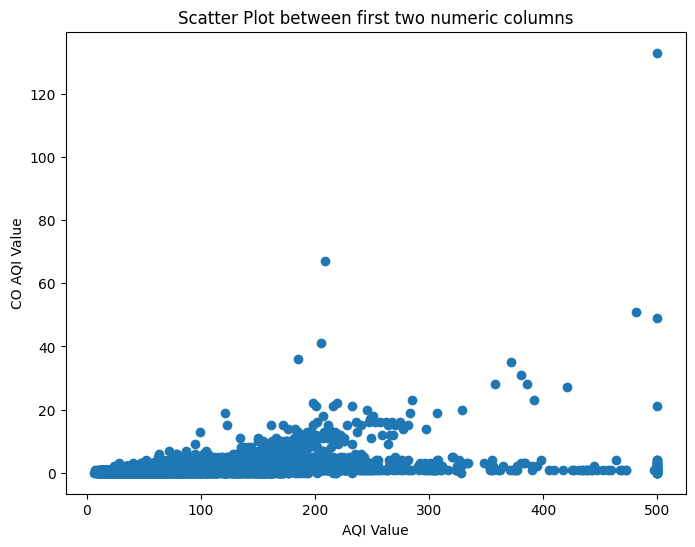

In [26]:

# Scatter Plot (only numeric columns)
if numeric_df.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1])
    plt.xlabel(numeric_df.columns[0])
    plt.ylabel(numeric_df.columns[1])
    plt.title('Scatter Plot between first two numeric columns')
    plt.show()
else:
    print("\nNot enough numeric columns for scatter plot.")

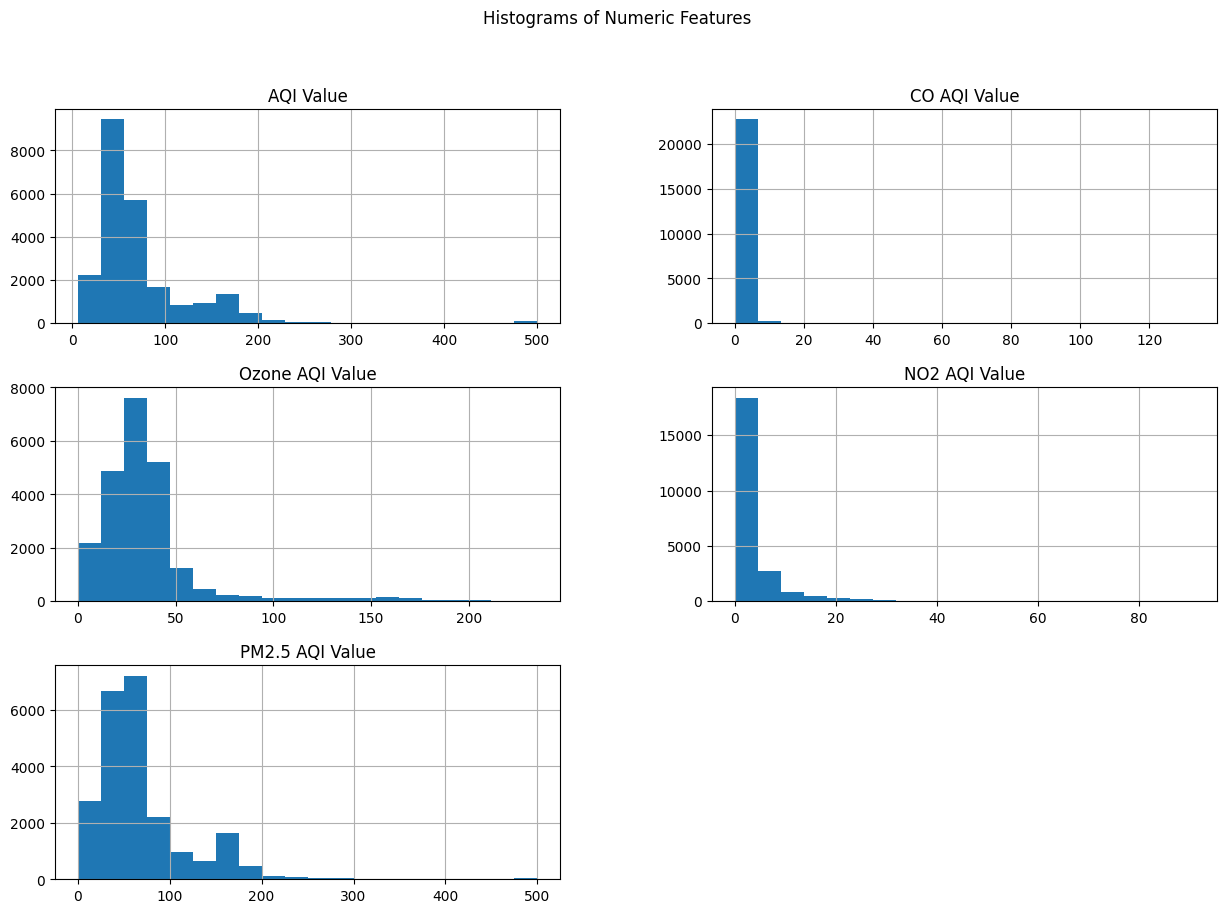

In [27]:
# Histogram
numeric_df.hist(figsize=(15,10), bins=20)
plt.suptitle('Histograms of Numeric Features')
plt.show()

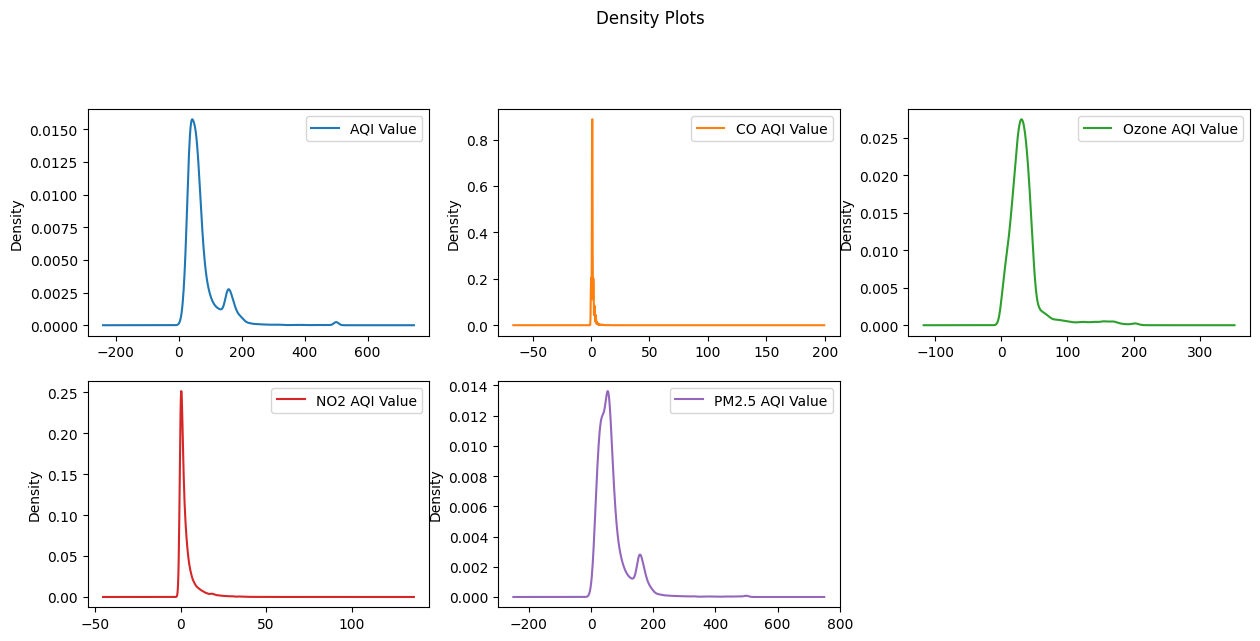

In [28]:
# Density plot
numeric_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,10))
plt.suptitle('Density Plots')
plt.show()

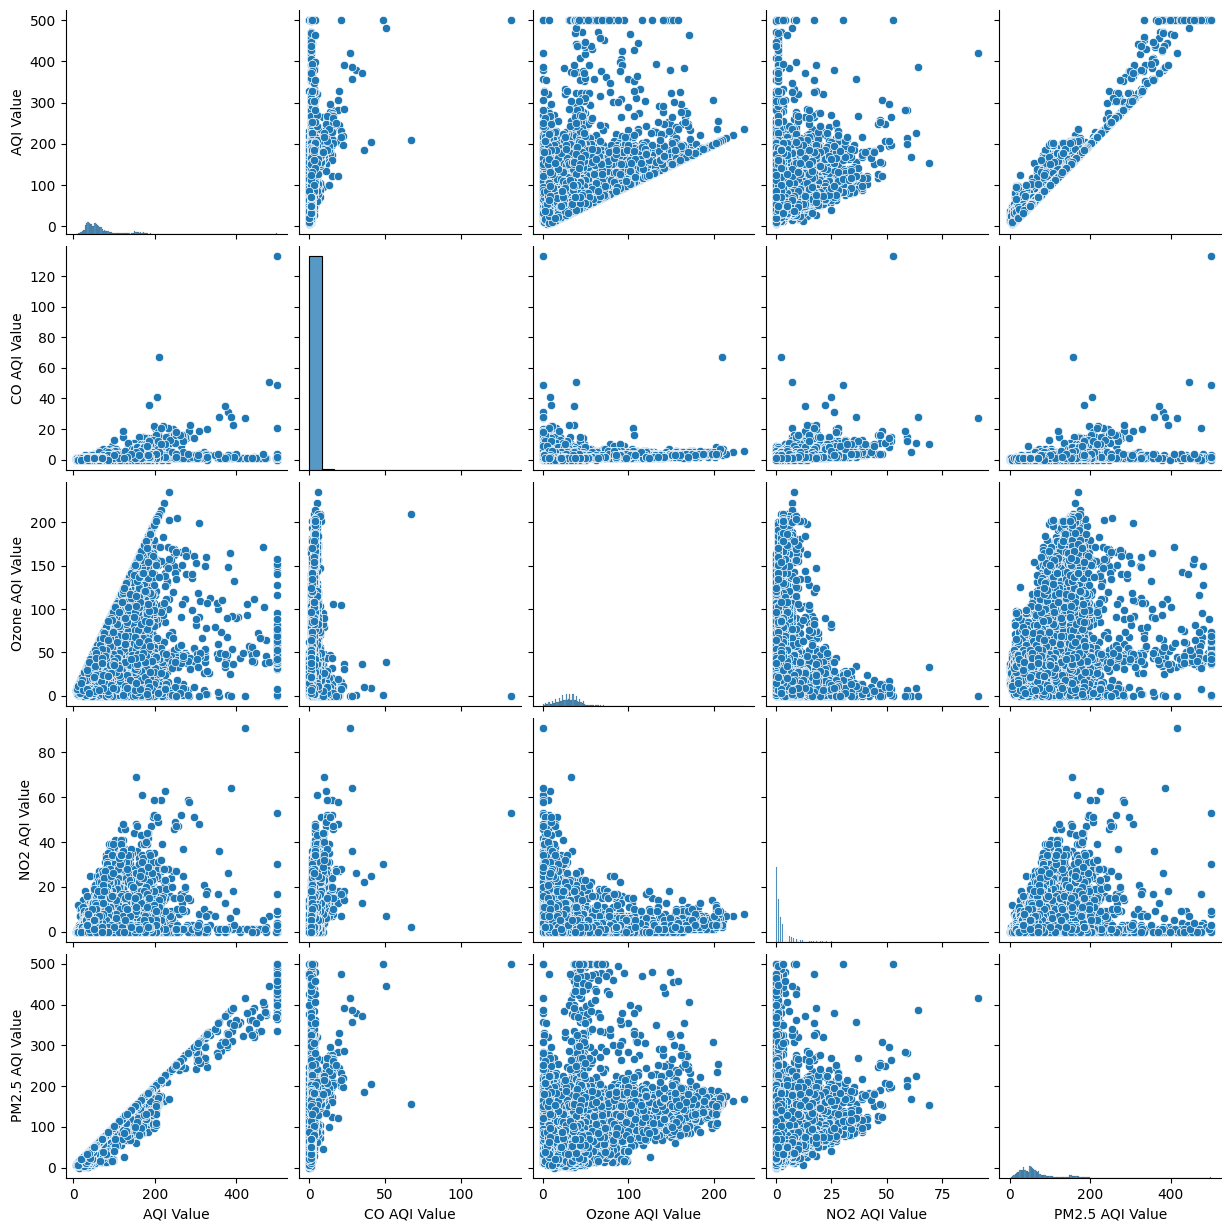

In [29]:


# Seaborn Pairplot (only numeric)
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df)
    plt.show()

In [30]:

# Bonus: Top 5 polluted days
if 'PM2.5' in df.columns:
    print("\nTop 5 most polluted days based on PM2.5:")
    print(df.sort_values('PM2.5', ascending=False).head())

print("\n--- Air Pollution Analysis Complete ---")


--- Air Pollution Analysis Complete ---
